In [1]:
#
# Logan Caldwell - matplotlib project visualization of ride shares
#

%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
df_city = pd.read_csv(city_data_to_load)
df_ride = pd.read_csv(ride_data_to_load)

df_ride.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [2]:
# Combine the data into a single dataset
#### Sort maybe not necessary below:
df_city_ride_combined = pd.merge(df_ride, df_city, on=["city","city"], how = "left")

# Display the data table for preview
df_city_ride_combined.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [3]:
df_city_ride_combined.dtypes

city             object
date             object
fare            float64
ride_id           int64
driver_count      int64
type             object
dtype: object

In [4]:
# Bubble Plot of ride share data
# Obtaining the x/y coordinates

urban_cities = df_city_ride_combined[df_city_ride_combined["type"] == "Urban"]
suburban_cities = df_city_ride_combined[df_city_ride_combined["type"] == "Suburban"]
rural_cities = df_city_ride_combined[df_city_ride_combined["type"] == "Rural"]

urban_ride_count = urban_cities.groupby(["city"]).count()["ride_id"]
urban_avg_fare = urban_cities.groupby(["city"]).mean()["fare"]
urban_driver_count = urban_cities.groupby(["city"]).mean()["driver_count"]

suburban_ride_count = suburban_cities.groupby(["city"]).count()["ride_id"]
suburban_avg_fare = suburban_cities.groupby(["city"]).mean()["fare"]
suburban_driver_count = suburban_cities.groupby(["city"]).mean()["driver_count"]

rural_ride_count = rural_cities.groupby(["city"]).count()["ride_id"]
rural_avg_fare = rural_cities.groupby(["city"]).mean()["fare"]
rural_driver_count = rural_cities.groupby(["city"]).mean()["driver_count"]

print(rural_ride_count)

city
Bradshawfurt         10
Garzaport             3
Harringtonfort        6
Jessicaport           6
Lake Jamie            6
Lake Latoyabury      11
Michaelberg          12
New Ryantown          6
Newtonview            4
North Holly           9
North Jaime           8
Penaborough           5
Randallchester        5
South Jennifer        7
South Marychester     8
South Saramouth       4
Taylorhaven           6
West Heather          9
Name: ride_id, dtype: int64


<IPython.core.display.Javascript object>


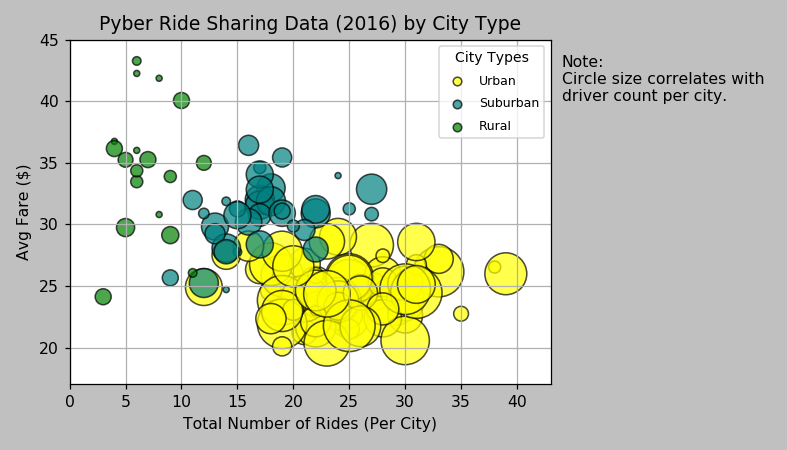

In [5]:
# Build the scatter plots for each city types

plt.figure(figsize=(7,4), facecolor="silver",)

plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=15*urban_driver_count, c="yellow", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.7, label="Urban")

plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=15*suburban_driver_count, c="teal", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.7, label="Suburban")

plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=15*rural_driver_count, c="green", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.7, label="Rural")

# Graph characteristics
plt.title("Pyber Ride Sharing Data (2016) by City Type")
plt.ylabel("Avg Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")

plt.xlim((0,43))
plt.ylim((17,45))

plt.grid(True, which="both")

# legend
lgnd = plt.legend(title_fontsize="9", fontsize="8", mode="expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="upper right", title="City Types", 
                  labelspacing=0.855)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.text(44, 40, "Note:\nCircle size correlates with \ndriver count per city.", withdash=True)

plt.tight_layout()

plt.savefig("output/Fig1.png")

plt.show()

## Total Fares by City Type

<IPython.core.display.Javascript object>


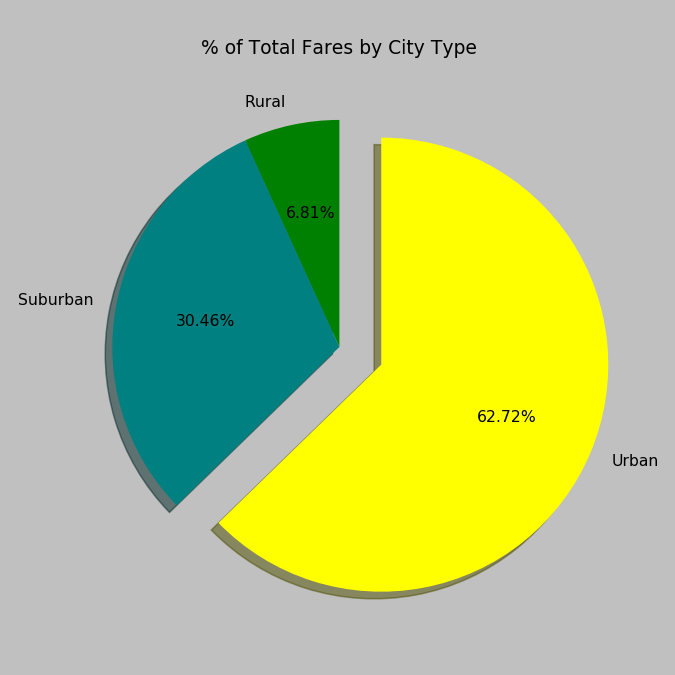

In [6]:
# Calculate Type Percents

city_type_percents = 100 * df_city_ride_combined.groupby(["type"]).sum()["fare"]/df_city_ride_combined["fare"].sum()
city_type_percents

# Build Pie Chart

plt.figure(figsize=(6,6), facecolor="silver",)

plt.pie(city_type_percents, labels=["Rural", "Suburban", "Urban"], colors=["green","teal", "yellow"], explode=[0,0,0.2], autopct='%1.2f%%', shadow=True, startangle=90)
plt.title("% of Total Fares by City Type")
plt.tight_layout()

# Save Figure

plt.savefig("output/Fig2.png")

# Show Figure
plt.show()

## Total Rides by City Type

1625 625 125


<IPython.core.display.Javascript object>


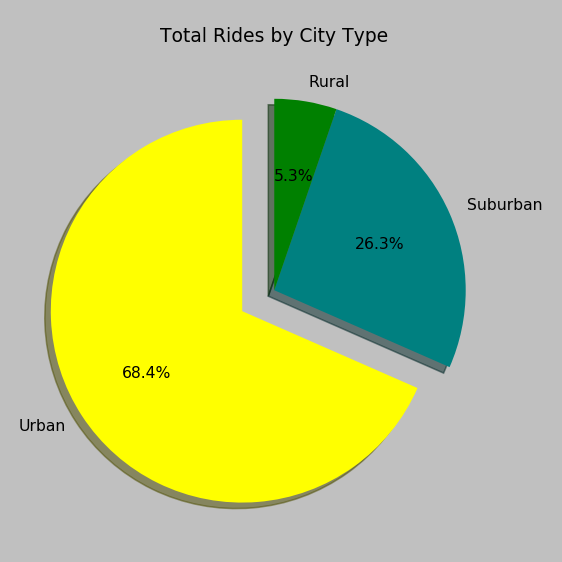

In [7]:
# Calculate Ride Percents

num_urban = int(urban_cities["city"].count())
num_suburban = int(suburban_cities["city"].count())
num_rural = int(rural_cities["city"].count())
print(num_urban, num_suburban, num_rural)

tot_fares = num_rural+num_suburban+num_urban

ride_nums = (num_urban/tot_fares, num_suburban/tot_fares, num_rural/tot_fares)

# Build Pie Chart

plt.figure(figsize=(5,5), facecolor="silver",)

plt.pie(ride_nums, labels=["Urban", "Suburban", "Rural"], autopct='%1.1f%%', colors=["yellow","teal", "green"], shadow=True, startangle=90, explode=[0.2,0,0])
plt.title("Total Rides by City Type")

plt.tight_layout()

# Save Figure

plt.savefig("output/Fig3.png")

plt.show()


## Total Drivers by City Type

<IPython.core.display.Javascript object>


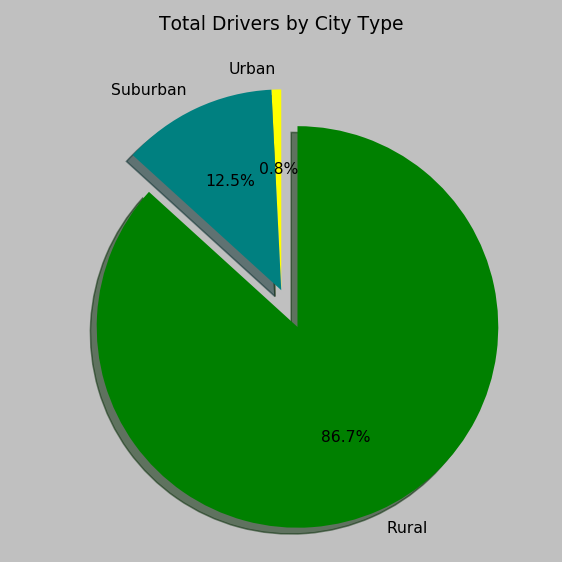

In [8]:
# Calculate Driver Percents

driver_percents = 100 * df_city_ride_combined.groupby(["type"]).sum()["driver_count"]/df_city_ride_combined["driver_count"].sum()

# Build Pie Charts

plt.figure(figsize=(5,5), facecolor="silver",)

plt.pie(driver_percents, labels=["Urban", "Suburban", "Rural"], autopct='%1.1f%%', colors=["yellow","teal", "green"], shadow=True, startangle=90, explode=[0,0,0.2])
plt.title("Total Drivers by City Type")

plt.tight_layout()

# Save Figure

plt.savefig("output/Fig4.png")

plt.show()


In [9]:
# Show Figure
